### 作業
目前已經學過許多的模型，相信大家對整體流程應該比較掌握了，這次作業請改用**手寫辨識資料集**，步驟流程都是一樣的，請試著自己撰寫程式碼來完成所有步驟

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

In [13]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [14]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
digits = datasets.load_digits()
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=4)
# 建立模型
clf = GradientBoostingClassifier()
# 訓練模型
clf.fit(x_train, y_train)
# 預測測試集
y_pred = clf.predict(x_test)

In [16]:
#acc = metrics.accuracy_score(y_test, y_pred)
#print("Acuuracy: ", acc)

print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))

Recall metric in the testing dataset : 0.9644444444444444
accuracy metric in the testing dataset : 0.9657695051754285


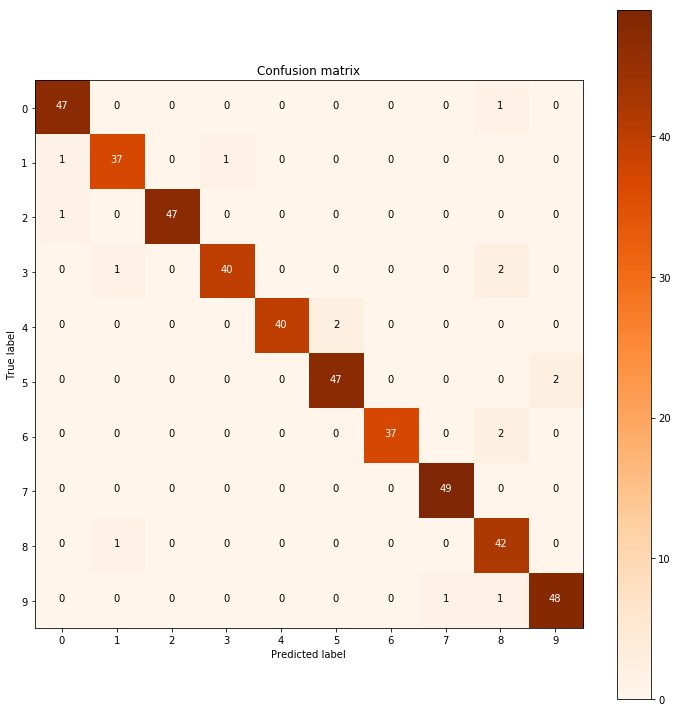

In [17]:
cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 10)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()

In [18]:
classifier = lgb.LGBMClassifier()
classifier.fit(x_train , y_train)
y_pred = classifier.predict(x_test)

In [19]:
print("Recall metric in the testing dataset : {}"\
      .format(metrics.accuracy_score(y_test , y_pred)))
print("accuracy metric in the testing dataset : {}"\
      .format(metrics.precision_score(y_test , y_pred , average='macro')))


Recall metric in the testing dataset : 0.9777777777777777
accuracy metric in the testing dataset : 0.9784466165794307


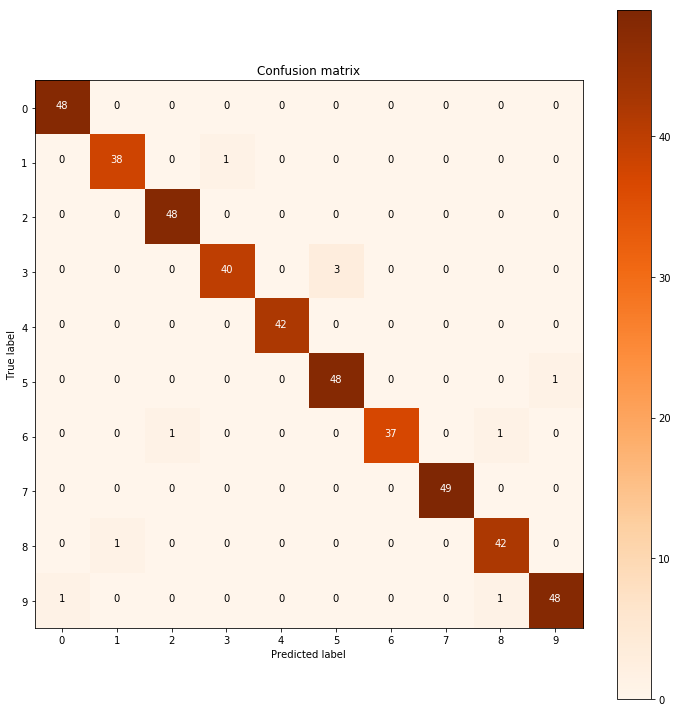

In [20]:
cnf_matrix = confusion_matrix(y_test , y_pred)
class_names = [i for i in range(0 , 10)]
plt.figure(figsize = (10 , 10))
plot_confusion_matrix(cnf_matrix , 
                      classes = class_names , 
                      title = 'Confusion matrix')
plt.show()